In [1]:
import healpy as hpy
import datetime
import os

from ACO_glouton import *
from functions import conversion
from functions import deconversion
from matplotlib import animation
from animation_path import *

date_aux="2017/03/09 23:00:00"

In [2]:
#Initializing the observer instance
obs=ephem.Observer()
obs.lat="-33:27:00"
obs.lon="-70:40:00"
obs.date=date_aux
#-------------------

In [3]:
#Calculating the Healpix discretization
Nside=16
Npix=hpy.pixelfunc.nside2npix(Nside)
ipixmin=int(Npix/2)
ipixmin=0
X=np.transpose(np.array(hpy.pixelfunc.pix2ang(Nside,np.arange(ipixmin,Npix,1))))
X[:,0] = np.pi/2-X[:,0]
#X[:,1] = X[:,1]-np.pi
#X*=180/np.pi
Num=np.size(X,0)
#---------------------------------

In [4]:
#Times since last visit
#T = npr.randint(6, size=Num)+1
if Num == 768:
    T=np.load('Times8_uniform.npy')
elif Num == 1536:
	T=np.load('Times.npy')
elif Num == 6144:
	T=np.load('Times32.npy')
elif Num == 3072:
    T=np.load('Times_complete.npy')
elif Num == 12288:
    T=np.load('Times32_complete.npy')
else:
    print 'Times since last observations created randomly'
    T=npr.randint(0,6,Num)
#-------------------------

In [5]:
ACO=ACOScheduleGlouton(X,obs,15,T)

2017-06-09 09:04:15.995587
0.479142396813
2017/3/9 23:31:13
2017/3/10 00:17:13
2017/3/10 01:03:13
2017/3/10 01:49:13
2017/3/10 02:35:13
2017/3/10 03:21:12
2017/3/10 04:07:12
2017/3/10 04:53:12
2017/3/10 05:39:12
2017/3/10 06:25:12
2017/3/10 07:11:12
2017/3/10 07:57:12
2017/3/10 08:43:11
2017/3/10 09:29:11
2017/3/10 10:15:11
0.00138888888889
Construccion Completa

2017-06-09 09:04:25.604035


In [6]:
ACO.RunACO_Pheromone(0,1)
print len(ACO.BPS)

*****************Super Ants******************
*****************Ants******************
0 0 2017-06-09 09:04:25.610060
new non dominated solution 2017-06-09 09:06:40.968464 Obs =  414.564067664 Time =  11442
new non dominated solution 2017-06-09 09:06:40.968877 Obs =  414.669515771 Time =  11438
new non dominated solution 2017-06-09 09:06:40.969209 Obs =  418.668392067 Time =  11294
new non dominated solution 2017-06-09 09:06:40.969630 Obs =  417.479935909 Time =  11358
new non dominated solution 2017-06-09 09:06:40.969879 Obs =  417.415839038 Time =  11406
new non dominated solution 2017-06-09 09:06:40.970154 Obs =  418.413869391 Time =  11350
new non dominated solution 2017-06-09 09:06:40.970442 Obs =  418.477502908 Time =  11302
new non dominated solution 2017-06-09 09:06:40.970705 Obs =  417.065620499 Time =  11414
new non dominated solution 2017-06-09 09:06:40.971151 Obs =  402.52104766 Time =  11714
new non dominated solution 2017-06-09 09:06:40.971411 Obs =  422.874977918 Time =  

In [7]:
if Nside==32:
    markersize=25
elif Nside==8:
    markersize=400
else:
    markersize=100

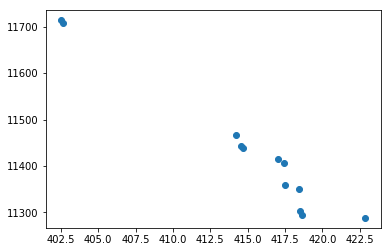

In [8]:
#fig=ACO.PlotParetoHistorial(show=True)
fig=ACO.PlotParetoFront(show=True)

In [9]:
timenow = datetime.datetime.now()

In [ ]:
def print_list(a):
    print '[',
    for i in a[:-1]:
        print i,',',
    print a[-1],']'


a = np.sort(np.transpose(np.array([int(i[1]*10)/10.0 for i in ACO.BPS])))
b = np.sort(np.transpose(np.array([i[2] for i in ACO.BPS])))[::-1]
print_list(a)
print_list(b)
title = "videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Values" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations)
np.savetxt("qhflsdjfn.txt",(a,b),fmt='%s',delimiter=',',newline=']\n[',header=' ')
lines = open("qhflsdjfn.txt").readlines()
open(title, 'w').writelines(lines[1:-1])
os.remove("qhflsdjfn.txt")

[ 402.5 , 402.6 , 414.1 , 414.5 , 414.6 , 417.0 , 417.4 , 417.4 , 418.4 , 418.4 , 418.6 , 422.8 ]
[ 11714 , 11708 , 11466 , 11442 , 11438 , 11414 , 11406 , 11358 , 11350 , 11302 , 11294 , 11288 ]


In [ ]:
if(1):
    print timenow
    fig = ACO.PlotParetoFront(title="%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig.savefig("videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    plt.clf()
    for i in range(len(ACO.BPS)):
        [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
        print "Saving equatorial for solution "+str(i+1)+"/"+str(len(ACO.BPS))
        animation_path(schedDR,(-10,-145,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_equatorial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1]*10)/10.0),marker='.',s=markersize)
        print "Saving horizontal for solution "+str(i+1)+"/"+str(len(ACO.BPS))
        plt.clf()
        animation_path(schedAA,(0,90,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_horizontal" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1]*10)/10.0),marker='.',s=markersize)
        plt.clf()
        plt.close('all')

2017-06-09 09:06:41.406528
Saving equatorial for solution 1/12
Saving horizontal for solution 1/12
Saving equatorial for solution 2/12
Saving horizontal for solution 2/12
Saving equatorial for solution 3/12
Saving horizontal for solution 3/12
Saving equatorial for solution 4/12
Saving horizontal for solution 4/12
Saving equatorial for solution 5/12
Saving horizontal for solution 5/12
Saving equatorial for solution 6/12
Saving horizontal for solution 6/12
Saving equatorial for solution 7/12
Saving horizontal for solution 7/12
Saving equatorial for solution 8/12
Saving horizontal for solution 8/12
Saving equatorial for solution 9/12
Saving horizontal for solution 9/12
Saving equatorial for solution 10/12
Saving horizontal for solution 10/12
Saving equatorial for solution 11/12
Saving horizontal for solution 11/12
